# Stock Market Prediction and Forecasting Using Stacked LSTM
In this project we will Predict the stock market price of TATA Global. The working process is as follows:
- Step 1: Collect the Stock data
- Step 2: Preprocess the Data- Train and Test
- Step 3: Create an Stacked LSTM model
- Step 4: Predict the test data and plot the output
- Step 5: Predict the future 30 days and plot the output

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./DATA/stockprice.csv')

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [12]:
# selecting the opening price of stock
op = df.reset_index()['Open']

In [13]:
op.shape

(2035,)

In [16]:
# print the opening price 
op

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

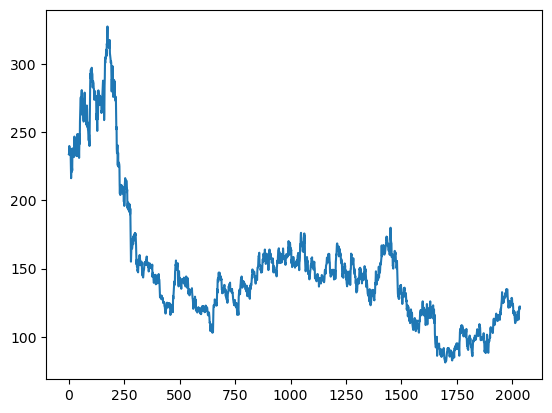

In [14]:
# plotting the graph of opening price data (visualizing)
import matplotlib.pyplot as plt
plt.plot(op)

# Preprocessing the data

In [17]:
### LSTM are sensitive to the of data, so we apply MinMax scaler

In [18]:
import numpy as np

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
op = scaler.fit_transform(np.array(op).reshape(-1,1))

In [21]:
print(op)

[[0.6202352 ]
 [0.62226277]
 [0.64436334]
 ...
 [0.16504461]
 [0.15896188]
 [0.16626115]]


In [22]:
### Splitting dataset into train and test split
training_size = int(len(op)*0.65)
test_size = len(op)-training_size
train_data,test_data= op[0:training_size],op[training_size:len(op),:1]

In [23]:
training_size, test_size

(1322, 713)

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t, t+1, t+2, t+3 and Y= t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [29]:
print(X_train)

[[0.6202352  0.62226277 0.64436334 ... 0.85908354 0.84549878 0.87145174]
 [0.62226277 0.64436334 0.61719384 ... 0.84549878 0.87145174 0.84225466]
 [0.64436334 0.61719384 0.61820762 ... 0.87145174 0.84225466 0.83515815]
 ...
 [0.31589619 0.32846715 0.3215734  ... 0.27047851 0.26277372 0.27716951]
 [0.32846715 0.3215734  0.33819951 ... 0.26277372 0.27716951 0.24756691]
 [0.3215734  0.33819951 0.33292782 ... 0.27716951 0.24756691 0.26094891]]


In [31]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [30]:
print(X_test.shape), print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [32]:
# reshape input to be [saple, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Creating the LSTM model

In [33]:
### Create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 64, verbose=1)

Epoch 1/100
20/20 [==============================] - 14s 346ms/step - loss: 0.0258 - val_loss: 0.0049
Epoch 2/100
20/20 [==============================] - 5s 225ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 3/100
20/20 [==============================] - 5s 268ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
20/20 [==============================] - 4s 206ms/step - loss: 0.0016 - val_loss: 8.4989e-04
Epoch 5/100
20/20 [==============================] - 5s 261ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 5s 239ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 5s 261ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 5s 228ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/100
20/20 [==============================] - 5s 250ms/step - loss: 0.0012 - val_loss: 9.6362e-04
Epoch 10/100
20/20 [==============================] - 5s 239ms/step - loss: 0.0011

20/20 [==============================] - 4s 200ms/step - loss: 4.7217e-04 - val_loss: 3.0003e-04
Epoch 77/100
20/20 [==============================] - 4s 212ms/step - loss: 3.7780e-04 - val_loss: 3.2696e-04
Epoch 78/100
20/20 [==============================] - 4s 217ms/step - loss: 3.7175e-04 - val_loss: 3.1239e-04
Epoch 79/100
20/20 [==============================] - 4s 216ms/step - loss: 4.1460e-04 - val_loss: 3.3504e-04
Epoch 80/100
20/20 [==============================] - 4s 207ms/step - loss: 3.3892e-04 - val_loss: 3.5959e-04
Epoch 81/100
20/20 [==============================] - 4s 199ms/step - loss: 3.4923e-04 - val_loss: 2.9425e-04
Epoch 82/100
20/20 [==============================] - 4s 207ms/step - loss: 3.3094e-04 - val_loss: 4.3619e-04
Epoch 83/100
20/20 [==============================] - 4s 217ms/step - loss: 3.4039e-04 - val_loss: 3.5347e-04
Epoch 84/100
20/20 [==============================] - 4s 207ms/step - loss: 4.5933e-04 - val_loss: 2.9006e-04
Epoch 85/100
20/20 [===

In [42]:
import tensorflow as tf

In [43]:
tf.__version__

'2.13.0'

In [51]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 1s 39ms/step


In [52]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [53]:
### CAlculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

163.37098612535772

# Predicting and Plotting 

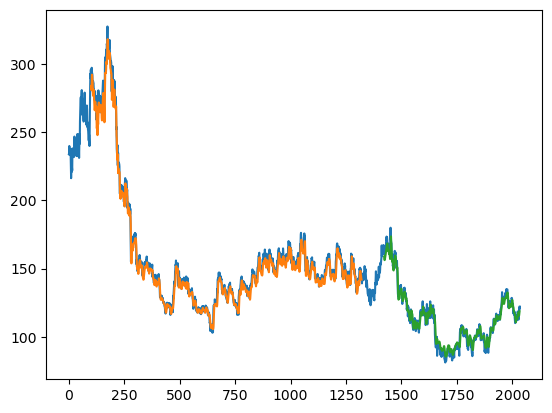

In [54]:
# Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(op)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions fot plotting
testPredictPlot = numpy.empty_like(op)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(op)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(op))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predict the data for 30 days and plot it

In [59]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 372)

In [60]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.048053527980535304,
 0.054947283049472884,
 0.04927007299270075,
 0.05231143552311435,
 0.05231143552311435,
 0.046228710462287104,
 0.05636658556366586,
 0.05616382806163833,
 0.04339010543390104,
 0.03994322789943233,
 0.04014598540145986,
 0.023317112733171108,
 0.027980535279805374,
 0.032441200324412,
 0.031832927818329304,
 0.03974047039740475,
 0.019870235198702346,
 0.02392538523925386,
 0.01662611516626117,
 0.020275750202757514,
 0.035279805352798066,
 0.02189781021897813,
 0.02960259529602599,
 0.02128953771289538,
 0.0366991078669911,
 0.031021897810219023,
 0.03953771289537711,
 0.04014598540145986,
 0.042984590429845926,
 0.03041362530413627,
 0.0180454176804542,
 0.01155717761557179,
 0.011759935117599374,
 0.004663422546634266,
 0.005271695052717018,
 0.0,
 0.006082725060827243,
 0.004055150040551514,
 0.005677210056772131,
 0.004460665044606682,
 0.011759935117599374,
 0.019464720194647234,
 0.024736415247364196,
 0.03284671532846717,
 0.033454987834549865,
 0.04176

In [61]:
# demonstrate prediciton for next 30 days
from numpy import array

lst_output = []
n_steps = 100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print (temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

0 day input [0.05494728 0.04927007 0.05231144 0.05231144 0.04622871 0.05636659
 0.05616383 0.04339011 0.03994323 0.04014599 0.02331711 0.02798054
 0.0324412  0.03183293 0.03974047 0.01987024 0.02392539 0.01662612
 0.02027575 0.03527981 0.02189781 0.0296026  0.02128954 0.03669911
 0.0310219  0.03953771 0.04014599 0.04298459 0.03041363 0.01804542
 0.01155718 0.01175994 0.00466342 0.0052717  0.         0.00608273
 0.00405515 0.00567721 0.00446067 0.01175994 0.01946472 0.02473642
 0.03284672 0.03345499 0.04176805 0.0405515  0.04257908 0.0405515
 0.04014599 0.04318735 0.04136253 0.03203569 0.02392539 0.01824818
 0.01987024 0.01784266 0.02372263 0.03081914 0.03609084 0.02879157
 0.02189781 0.02919708 0.01987024 0.02047851 0.00851582 0.00587997
 0.00973236 0.013382   0.01784266 0.01520681 0.02270884 0.03264396
 0.02676399 0.02392539 0.0148013  0.04217356 0.04257908 0.03892944
 0.03649635 0.04906732 0.04622871 0.04115977 0.04379562 0.04420114
 0.05616383 0.05515004 0.05636659 0.0405515  0.0452

ValueError: cannot reshape array of size 371 into shape (1,100,1)

In [63]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [64]:
import matplotlib.pyplot as plt

In [65]:
len(op)

2035

In [66]:
new_op = op.tolist()
new_op.extend(lst_output)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

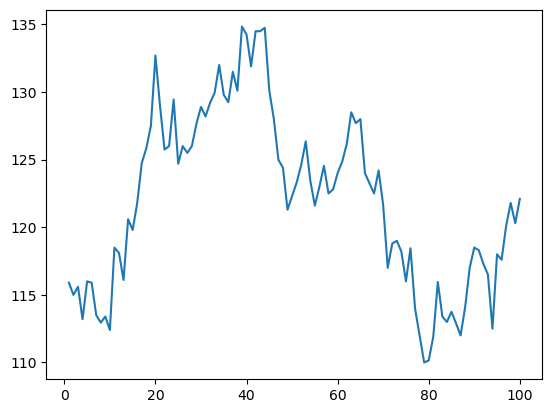

In [70]:
plt.plot(day_new,scaler.inverse_transform(op[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

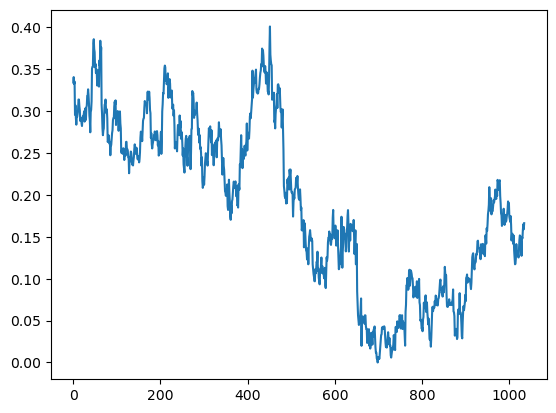

In [71]:
plt.plot(new_op[1000:])